# extract SSU, SSV, Eta for Fred

---

In [1]:
import os
#from glob import glob
#import numpy as np
#import dask
import xarray as xr

from matplotlib import pyplot as plt
%matplotlib inline

import mitequinox.utils as ut
import mitequinox.parcels as pa

INFO: Compiled ParcelsRandom ==> /dev/shm/pbs.3390381.datarmor0/parcels-55081/libparcels_random_bc6a3b03-7dd7-453d-b591-aedd42b803b8.so


---

# load data


In [45]:
# load llc data
ds = ut.load_data(V=['SSU', 'SSV', 'Eta', 'oceTAUX', 'oceTAUY'])
grd = ut.load_grd()[['XC', 'YC', 'XG', 'YG']]
ds = xr.merge([ds, grd])

In [31]:
# output directory
output_dir = ut.scratch

In [48]:
def select_store(ds0, face, time, i, j, name, write=False):

    ds = ds0.sel(face=face, time=time)

    # overview
    _ds = ds.isel({'i': slice(0,None,4), 'i_g': slice(0,None,4), 
                   'j': slice(0,None,4), 'j_g': slice(0,None,4),
                  })

    fig, axes = plt.subplots(1,1, figsize=(5,5))
    _ds['Eta'].plot(ax=axes)

    # subselection
    _ds = ds.isel({'i': i, 'i_g': i, 'j': j, 'j_g':j})
    fig, axes = plt.subplots(1,3, figsize=(15,5))
    _ds['Eta'].plot(ax=axes[0])
    _ds['SSU'].plot(ax=axes[1])
    _ds['oceTAUX'].plot(ax=axes[2])

    fig, axes = plt.subplots(1,1, figsize=(5,5))
    _ds['Eta'].plot(ax=axes, x='XC', y='YC')
    
    if write:
        # store data
        data_path = os.path.join(out_dir, name+'.nc')
        _ds.to_netcdf(data_path, mode='w')
        print('File store in {}'.format(data_path))

---

In [ ]:
# select several areas: Med Sea, Gulf stream

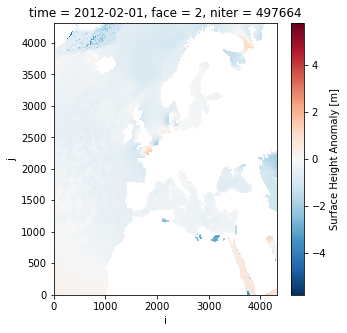

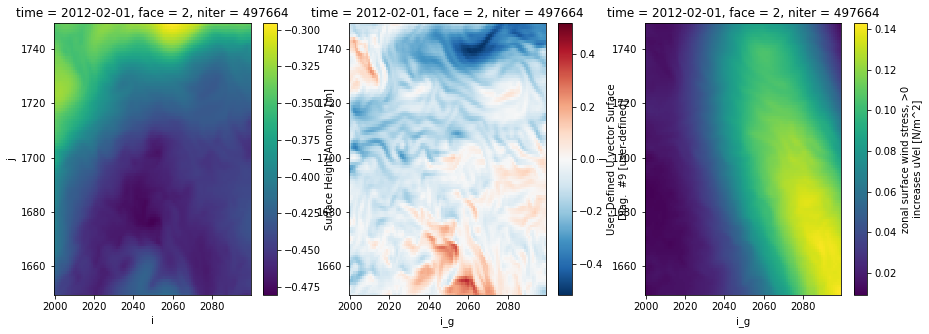

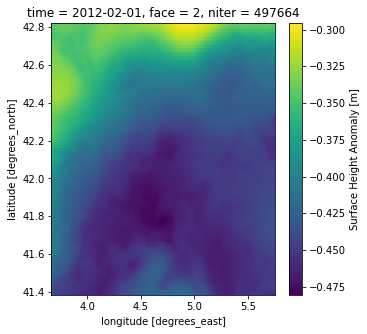

In [49]:
face = 2
time = '2012-02-01-00:00:00'
name = 'medsea_west'
i, j = slice(2000, 2100), slice(1650, 1750)
        
select_store(ds, face, time, i, j, name, write=False)

File store in /home1/scratch/aponte/aghulas.nc


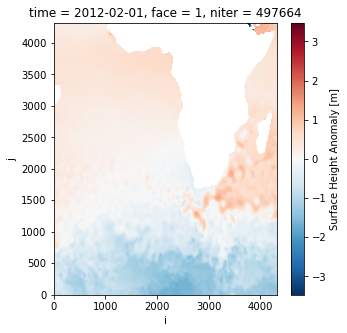

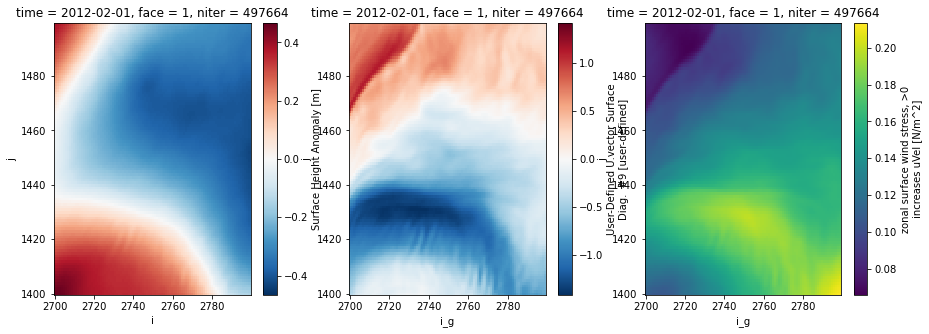

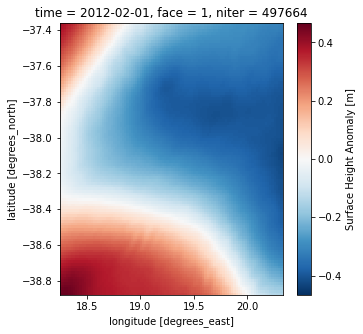

In [60]:
face = 1
time = '2012-02-01-00:00:00'
name = 'aghulas'
i, j = slice(2700, 2800), slice(1400, 1500)

select_store(ds, face, time, i, j, name, write=True)

File store in /home1/scratch/aponte/gulf_stream.nc


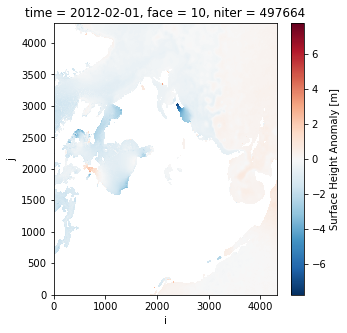

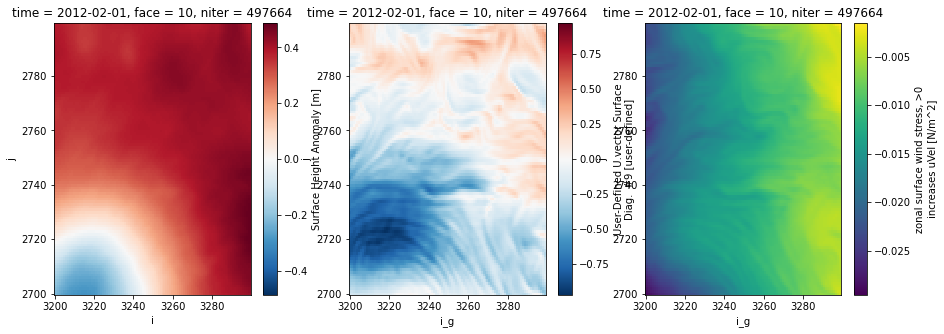

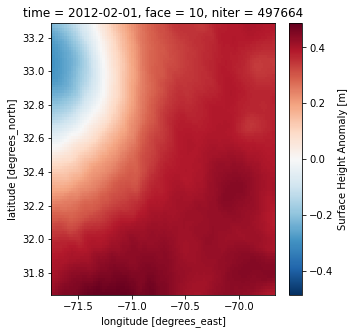

In [62]:
face = 10
time = '2012-02-01-00:00:00'
name = 'gulf_stream'
i, j = slice(3200, 3300), slice(2700, 2800)

select_store(ds, face, time, i, j, name, write=True)